In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def binary_encode_categorical(df):

    # Create a copy to avoid modifying the input
    df_encoded = df.copy()
    
    # Initialize lists to store transformed columns
    new_columns = []
    
    # Enumerate through columns
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            # Handle missing values by filling with a placeholder
            df_encoded[col] = df_encoded[col].fillna('MISSING')
            
            # Get unique values
            unique_values = df_encoded[col].unique()
            n_unique = len(unique_values)
            
            if n_unique == 1:
                # Drop column with single unique value (no information)
                print(f"Dropping column '{col}' (single unique value: {unique_values[0]})")
                continue
            elif n_unique == 2:
                # Binary category: use label encoding (0 and 1)
                le = LabelEncoder()
                new_columns.append(pd.DataFrame(
                    {col: le.fit_transform(df_encoded[col])},
                    index=df_encoded.index
                ))
                print(f"Label encoded column '{col}' (values: {unique_values} -> [0, 1])")
            else:
                # Multi-class: use one-hot encoding
                one_hot = pd.get_dummies(df_encoded[col], prefix=col, dtype=int)
                new_columns.append(one_hot)
                print(f"One-hot encoded column '{col}' ({n_unique} categories)")
        else:
            # Keep numerical columns unchanged
            new_columns.append(df_encoded[[col]])
            print(f"Keeping numerical column '{col}' unchanged")
    
    # Concatenate all columns
    df_transformed = pd.concat(new_columns, axis=1)
    
    # Remove any duplicate columns (if any)
    df_transformed = df_transformed.loc[:, ~df_transformed.columns.duplicated()]
    
    # Handle any remaining missing values
    df_transformed = df_transformed.fillna(0)
    
    print(f"Original shape: {df.shape}, Transformed shape: {df_transformed.shape}")
    
    return df_transformed


In [5]:
df_t=binary_encode_categorical(df)
df_t

Keeping numerical column 'person_age' unchanged
Label encoded column 'person_gender' (values: ['female' 'male'] -> [0, 1])
One-hot encoded column 'person_education' (5 categories)
Keeping numerical column 'person_income' unchanged
Keeping numerical column 'person_emp_exp' unchanged
One-hot encoded column 'person_home_ownership' (4 categories)
Keeping numerical column 'loan_amnt' unchanged
One-hot encoded column 'loan_intent' (6 categories)
Keeping numerical column 'loan_int_rate' unchanged
Keeping numerical column 'loan_percent_income' unchanged
Keeping numerical column 'cb_person_cred_hist_length' unchanged
Keeping numerical column 'credit_score' unchanged
Label encoded column 'previous_loan_defaults_on_file' (values: ['No' 'Yes'] -> [0, 1])
Keeping numerical column 'loan_status' unchanged
Original shape: (45000, 14), Transformed shape: (45000, 26)


,person_age,person_gender,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_income,person_emp_exp,person_home_ownership_MORTGAGE,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,0,0,0,0,1,71948.0,0,0,...,0,0,1,0,16.02,0.49,3.0,561,0,1
1,21.0,0,0,0,0,1,0,12282.0,0,0,...,0,0,0,0,11.14,0.08,2.0,504,1,0
2,25.0,0,0,0,0,1,0,12438.0,3,1,...,0,1,0,0,12.87,0.44,3.0,635,0,1
3,23.0,0,0,1,0,0,0,79753.0,0,0,...,0,1,0,0,15.23,0.44,2.0,675,0,1
4,24.0,1,0,0,0,0,1,66135.0,1,0,...,0,1,0,0,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,0,0,0,0,47971.0,6,0,...,0,1,0,0,15.66,0.31,3.0,645,0,1
44996,37.0,0,1,0,0,0,0,65800.0,17,0,...,1,0,0,0,14.07,0.14,11.0,621,0,1
44997,33.0,1,1,0,0,0,0,56942.0,7,0,...,0,0,0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,0,1,0,0,0,33164.0,4,0,...,0,0,0,0,13.23,0.36,6.0,604,0,1


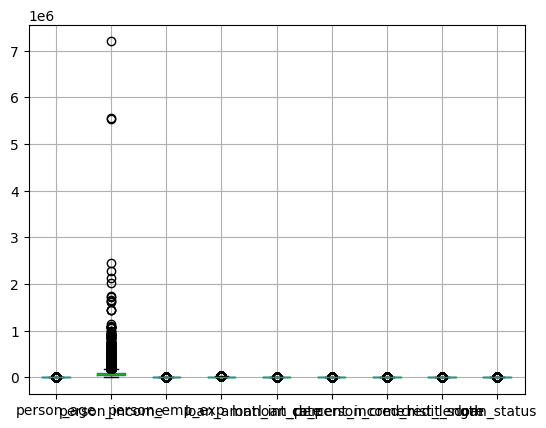

In [10]:
df.boxplot()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize_features(df):
    # Create a copy to avoid modifying the input
    normalized_df = df.copy()
    
    # Initialize dictionary to store scalers for numerical columns
    feature_scalers = {}
    
    # Enumerate through columns
    for col in normalized_df.columns:
        # Only normalize numerical columns (float, int, but not binary 0/1)
        if normalized_df[col].dtype in ['float64', 'float32', 'int64', 'int32'] and \
           not normalized_df[col].isin([0, 1]).all():  # Skip binary columns
            scaler = MinMaxScaler()
            normalized_df[col] = scaler.fit_transform(normalized_df[[col]])
            feature_scalers[col] = scaler
            print(f"Normalized numerical column '{col}' to [0, 1]")
        else:
            print(f"Skipped column '{col}' (binary or non-numerical)")
    
    return normalized_df, feature_scalers

In [13]:
df_n=normalize_features(df_t)[0]

Normalized numerical column 'person_age' to [0, 1]
Skipped column 'person_gender' (binary or non-numerical)
Skipped column 'person_education_Associate' (binary or non-numerical)
Skipped column 'person_education_Bachelor' (binary or non-numerical)
Skipped column 'person_education_Doctorate' (binary or non-numerical)
Skipped column 'person_education_High School' (binary or non-numerical)
Skipped column 'person_education_Master' (binary or non-numerical)
Normalized numerical column 'person_income' to [0, 1]
Normalized numerical column 'person_emp_exp' to [0, 1]
Skipped column 'person_home_ownership_MORTGAGE' (binary or non-numerical)
Skipped column 'person_home_ownership_OTHER' (binary or non-numerical)
Skipped column 'person_home_ownership_OWN' (binary or non-numerical)
Skipped column 'person_home_ownership_RENT' (binary or non-numerical)
Normalized numerical column 'loan_amnt' to [0, 1]
Skipped column 'loan_intent_DEBTCONSOLIDATION' (binary or non-numerical)
Skipped column 'loan_intent_

In [15]:
df_n

,person_age,person_gender,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_income,person_emp_exp,person_home_ownership_MORTGAGE,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0.016129,0,0,0,0,0,1,0.008891,0.000,0,...,0,0,1,0,0.727023,0.742424,0.035714,0.371739,0,1
1,0.008065,0,0,0,0,1,0,0.000595,0.000,0,...,0,0,0,0,0.392318,0.121212,0.000000,0.247826,1,0
2,0.040323,0,0,0,0,1,0,0.000617,0.024,1,...,0,1,0,0,0.510974,0.666667,0.035714,0.532609,0,1
3,0.024194,0,0,1,0,0,0,0.009976,0.000,0,...,0,1,0,0,0.672840,0.666667,0.000000,0.619565,0,1
4,0.032258,1,0,0,0,0,1,0.008082,0.008,0,...,0,1,0,0,0.606996,0.803030,0.071429,0.426087,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.056452,1,1,0,0,0,0,0.005557,0.048,0,...,0,1,0,0,0.702332,0.469697,0.035714,0.554348,0,1
44996,0.137097,0,1,0,0,0,0,0.008036,0.136,0,...,1,0,0,0,0.593278,0.212121,0.321429,0.502174,0,1
44997,0.104839,1,1,0,0,0,0,0.006804,0.056,0,...,0,0,0,0,0.315501,0.075758,0.285714,0.604348,0,1
44998,0.072581,1,0,1,0,0,0,0.003499,0.032,0,...,0,0,0,0,0.535665,0.545455,0.142857,0.465217,0,1


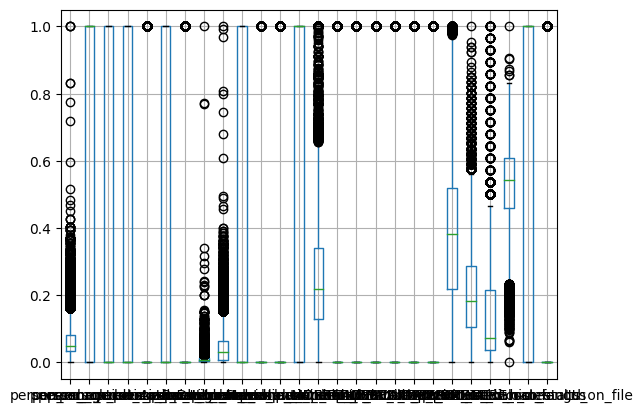

In [14]:
df_n.boxplot()
plt.show()

In [21]:
 # Separate features and label (last column is label)
X = df_n.iloc[:, :-1]  # All columns except the last
y = df_n.iloc[:, -1]   # Last column as label
    

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

def evaluate_classification_models(X,y, test_size=0.2, random_state=42):

   
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Initialize models with default parameters
    models = {
        'RandomForest': RandomForestClassifier(random_state=random_state),
        'XGBoost': XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss'),
        'CatBoost': CatBoostClassifier(random_state=random_state, verbose=0),
        'LightGBM': LGBMClassifier(random_state=random_state, verbose=-1)
    }
    
    # Dictionary to store accuracies
    accuracies = {}
    
    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[model_name] = acc
        print(f"{model_name} Accuracy: {acc:.4f}")
    
    return accuracies

In [23]:
evaluate_classification_models(X,y, test_size=0.2, random_state=42)

RandomForest Accuracy: 0.9298
XGBoost Accuracy: 0.9358
CatBoost Accuracy: 0.9350
LightGBM Accuracy: 0.9312


{'RandomForest': 0.9297777777777778,
 'XGBoost': 0.9357777777777778,
 'CatBoost': 0.935,
 'LightGBM': 0.9312222222222222}

In [24]:
y.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [25]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [26]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

def resample_classes(df, random_state=42):

    # Separate features and label (last column is label)
    X = df.iloc[:, :-1].copy()
    y = df.iloc[:, -1].copy()
    
    # Print original class distribution
    class_counts = y.value_counts()
    print("Original class distribution:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count} ({count/len(y)*100:.2f}%)")
    
    # Determine target count (size of majority class)
    target_count = class_counts.max()
    
    # Initialize lists to store balanced data
    X_balanced_list = []
    y_balanced_list = []
    
    # Resample each class to match the majority class
    for cls in class_counts.index:
        # Get indices for the current class
        class_indices = y[y == cls].index
        X_class = X.loc[class_indices]
        y_class = y.loc[class_indices]
        
        # Oversample minority class or keep majority class
        if len(class_indices) < target_count:
            X_class_resampled, y_class_resampled = resample(
                X_class, y_class,
                replace=True,  # Sample with replacement
                n_samples=target_count,  # Match majority class size
                random_state=random_state
            )
            print(f"Oversampled class {cls} from {len(class_indices)} to {target_count}")
        else:
            X_class_resampled, y_class_resampled = X_class, y_class
            print(f"Kept class {cls} with {len(class_indices)} samples (majority class)")
        
        X_balanced_list.append(X_class_resampled)
        y_balanced_list.append(y_class_resampled)
    
    # Concatenate balanced data
    X_balanced = pd.concat(X_balanced_list, axis=0)
    y_balanced = pd.concat(y_balanced_list, axis=0)
    
    # Shuffle the data
    shuffled_indices = np.random.RandomState(random_state).permutation(len(X_balanced))
    X_balanced = X_balanced.iloc[shuffled_indices].reset_index(drop=True)
    y_balanced = y_balanced.iloc[shuffled_indices].reset_index(drop=True)
    
    # Print new class distribution
    new_class_counts = y_balanced.value_counts()
    print("\nBalanced class distribution:")
    for cls, count in new_class_counts.items():
        print(f"Class {cls}: {count} ({count/len(y_balanced)*100:.2f}%)")
    
    print(f"Original shape: {df.shape}, Balanced shape: ({X_balanced.shape[0]}, {X_balanced.shape[1] + 1})")
    
    return X_balanced, y_balanced


In [27]:
X,y=resample_classes(df_n, random_state=42)

Original class distribution:
Class 0: 35000 (77.78%)
Class 1: 10000 (22.22%)
Kept class 0 with 35000 samples (majority class)
Oversampled class 1 from 10000 to 35000

Balanced class distribution:
Class 1: 35000 (50.00%)
Class 0: 35000 (50.00%)
Original shape: (45000, 26), Balanced shape: (70000, 26)


In [28]:
evaluate_classification_models(X,y, test_size=0.2, random_state=42)

RandomForest Accuracy: 0.9726
XGBoost Accuracy: 0.9455
CatBoost Accuracy: 0.9406
LightGBM Accuracy: 0.9258


{'RandomForest': 0.9725714285714285,
 'XGBoost': 0.9455,
 'CatBoost': 0.9405714285714286,
 'LightGBM': 0.9257857142857143}